In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

In [31]:
sns.set()

In [4]:
df = pd.read_excel('data/strava.xlsx', parse_dates=[1])

In [66]:
# drop latlonf for privacy
df.drop(['start_latlng', 'end_latlng'], axis=1, inplace=True)

In [67]:
df.head()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round
0,791431733,2016-12-02 13:45:43+00:00,Afternoon Ride,12010.5,2329,Ride,NaN,NaN,5.157,10.3,51.2,clear-day,Clear,26.05,2016-12-02,13:45:43,26.0
1,794032933,2016-12-05 06:54:59+00:00,Morning Ride,11943.4,3965,Ride,NaN,NaN,3.012,11.1,56.5,clear-day,Clear,23.29,2016-12-05,06:54:59,23.0
2,794247639,2016-12-05 13:44:33+00:00,Afternoon Ride,12129.5,2412,Ride,NaN,NaN,5.029,10.5,52.3,clear-day,Clear,26.88,2016-12-05,13:44:33,27.0
3,795731385,2016-12-07 05:32:15+00:00,Morning Ride,11911.7,1743,Ride,NaN,NaN,6.834,13.5,57.7,partly-cloudy-day,Partly Cloudy,19.59,2016-12-07,05:32:15,20.0
4,796021123,2016-12-07 13:56:10+00:00,Afternoon Ride,12071.6,1964,Ride,NaN,NaN,6.146,15.0,52.7,partly-cloudy-day,Partly Cloudy,25.09,2016-12-07,13:56:10,25.0


In [6]:
df.dtypes

id                                    int64
start_date              datetime64[ns, UTC]
name                                 object
distance                            float64
moving_time                           int64
type                                 object
average_heartrate                   float64
max_heartrate                       float64
average_speed                       float64
max_speed                           float64
total_elevation_gain                float64
start_latlng                         object
end_latlng                           object
weather_icon                         object
weather_summary                      object
weather_temperature                 float64
dtype: object

In [7]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df['start_date']])
df = df.assign(date=new_dates, time=new_times)

In [10]:
df['date'][0]

datetime.date(2016, 12, 2)

In [11]:
df['weather_temperature_round'] = round(df.weather_temperature)

In [12]:
df['weather_temperature_round'].value_counts()

20.0    53
19.0    52
21.0    48
18.0    45
22.0    40
15.0    39
17.0    38
16.0    28
14.0    25
23.0    22
26.0    22
24.0    21
12.0    20
25.0    20
11.0    15
27.0    14
28.0    14
13.0    12
10.0    11
7.0      7
30.0     4
9.0      4
32.0     3
29.0     3
33.0     3
6.0      2
31.0     2
8.0      2
3.0      1
Name: weather_temperature_round, dtype: int64

In [14]:
df[df['weather_temperature_round'] == 3.0]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round
468,1710032763,2018-07-16 06:21:28+00:00,Morning Ride,8658.6,1571,Ride,147.1,186.0,5.512,12.5,52.5,"[-33.98,18.49]","[-33.93,18.45]",clear-day,Clear,3.24,2018-07-16,06:21:28,3.0


In [16]:
df.head()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round
0,791431733,2016-12-02 13:45:43+00:00,Afternoon Ride,12010.5,2329,Ride,NaN,NaN,5.157,10.3,51.2,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,26.05,2016-12-02,13:45:43,26.0
1,794032933,2016-12-05 06:54:59+00:00,Morning Ride,11943.4,3965,Ride,NaN,NaN,3.012,11.1,56.5,"[-33.98,18.49]","[-33.92,18.42]",clear-day,Clear,23.29,2016-12-05,06:54:59,23.0
2,794247639,2016-12-05 13:44:33+00:00,Afternoon Ride,12129.5,2412,Ride,NaN,NaN,5.029,10.5,52.3,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,26.88,2016-12-05,13:44:33,27.0
3,795731385,2016-12-07 05:32:15+00:00,Morning Ride,11911.7,1743,Ride,NaN,NaN,6.834,13.5,57.7,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Partly Cloudy,19.59,2016-12-07,05:32:15,20.0
4,796021123,2016-12-07 13:56:10+00:00,Afternoon Ride,12071.6,1964,Ride,NaN,NaN,6.146,15.0,52.7,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,25.09,2016-12-07,13:56:10,25.0


In [17]:
df.tail()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round
565,2719940279,2019-09-17 16:02:09+00:00,Evening Activity,0.0,5868,Workout,156.5,191.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-09-17,16:02:09,22.0
566,2753579936,2019-09-21 05:10:47+00:00,Morning Activity,0.0,4521,Workout,146.0,192.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-09-21,05:10:47,22.0
567,2753580445,2019-09-28 05:11:30+00:00,Morning Activity,0.0,4518,Workout,140.4,184.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-09-28,05:11:30,22.0
568,2756323401,2019-10-01 16:02:21+00:00,Evening Activity,0.0,3111,Workout,160.2,187.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-10-01,16:02:21,22.0
569,2756323665,2019-10-01 17:04:55+00:00,Evening Activity,0.0,2757,Workout,154.9,186.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-10-01,17:04:55,22.0


In [18]:
df.weather_summary.value_counts()

Clear                      227
Partly Cloudy              183
Mostly Cloudy              115
Overcast                    38
Windy and Partly Cloudy      4
Possible Drizzle             2
Light Rain                   1
Name: weather_summary, dtype: int64

In [19]:
df.name.value_counts()

Morning Ride                   257
Afternoon Ride                 231
Morning Run                     21
Evening Run                     11
Evening Activity                 9
Afternoon Activity               8
Lunch Ride                       6
Morning Activity                 5
Afternoon Run                    5
Evening Ride                     4
Morning Ride with roadsters      1
Night Activity - It              1
Night Activity                   1
afternoon Ride                   1
Running from the devil           1
FKT 3.0 take two                 1
Morning Solo Run                 1
Morning chillin Ride             1
Batrun Recce                     1
Afternoon burrrn                 1
1st TT for 2019                  1
Cool Morning Ride                1
Celtics trail Run                1
Name: name, dtype: int64

## Create subset that only includes rides

In [20]:
activity_ride = ['Morning Ride', 'Afternoon Ride', 'Lunch Ride', 'Evening Ride', 'Morning chillin Ride', 'Cool Morning Ride', 'Morning Ride with roadsters', 'afternoon Ride']

In [21]:
rides = df[df.name.isin(activity_ride)]

I exclude December 2016 and January 2019 so as to get two full years of data

In [22]:
# filtering to include 2 "full" years
rides = rides[(rides.start_date > '2017-01-01 00:00') & (rides.start_date < '2019-01-01 00:00')]

In [24]:
rides.head()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round
18,825995859,2017-01-05 05:40:50+00:00,Morning Ride,14068.4,2641,Ride,NaN,NaN,5.327,10.8,73.4,"[-33.98,18.49]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,20.32,2017-01-05,05:40:50,20.0
19,826004613,2017-01-09 05:05:37+00:00,Morning Ride,11656.7,1649,Ride,NaN,NaN,7.069,11.6,62.0,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Partly Cloudy,19.95,2017-01-09,05:05:37,20.0
20,826347689,2017-01-09 13:55:28+00:00,Afternoon Ride,12747.4,3144,Ride,NaN,NaN,4.055,13.5,78.5,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,24.55,2017-01-09,13:55:28,25.0
21,827011243,2017-01-10 05:08:35+00:00,Morning Ride,11638.4,1739,Ride,NaN,NaN,6.693,10.7,60.5,"[-33.98,18.49]","[-33.92,18.42]",clear-day,Clear,19.58,2017-01-10,05:08:35,20.0
22,827376855,2017-01-10 13:50:34+00:00,Afternoon Ride,11917.7,2423,Ride,NaN,NaN,4.919,9.6,73.2,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,30.94,2017-01-10,13:50:34,31.0


In [25]:
rides.tail()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round
543,1973097829,2018-11-16 14:18:19+00:00,Afternoon Ride,3666.9,628,Ride,155.6,184.0,5.839,14.2,24.8,"[-33.99,18.5]","[-33.98,18.49]",partly-cloudy-day,Mostly Cloudy,21.24,2018-11-16,14:18:19,21.0
544,2113085260,2018-11-19 06:25:47+00:00,Morning Ride,8734.0,1534,Ride,144.3,188.0,5.694,12.4,55.8,"[-33.98,18.49]","[-33.93,18.45]",partly-cloudy-day,Mostly Cloudy,20.48,2018-11-19,06:25:47,20.0
545,2113085274,2018-11-19 14:54:27+00:00,Afternoon Ride,8632.7,1416,Ride,140.3,180.0,6.097,13.4,70.9,"[-33.93,18.45]","[-33.98,18.49]",clear-day,Clear,21.18,2018-11-19,14:54:27,21.0
546,2113085319,2018-11-21 06:43:44+00:00,Morning Ride,8690.4,1464,Ride,133.6,173.0,5.936,14.5,55.6,"[-33.98,18.49]","[-33.93,18.45]",partly-cloudy-day,Mostly Cloudy,17.99,2018-11-21,06:43:44,18.0
547,2113085283,2018-11-21 14:44:25+00:00,Afternoon Ride,8653.5,1702,Ride,127.1,180.0,5.084,10.2,71.7,"[-33.93,18.45]","[-33.98,18.49]",partly-cloudy-day,Windy and Partly Cloudy,18.16,2018-11-21,14:44:25,18.0


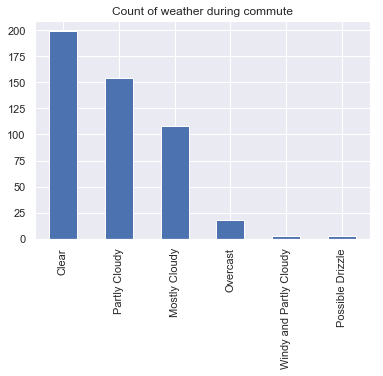

In [32]:
rides.weather_summary.value_counts().plot(kind='bar', title="Count of weather during commute")

In [27]:
rides.name.unique()

array(['Morning Ride', 'Afternoon Ride', 'Evening Ride',
       'Morning chillin Ride', 'Cool Morning Ride', 'Lunch Ride',
       'afternoon Ride'], dtype=object)

In [28]:
rides = rides.replace({'name' : {'Morning chillin Ride': 'Morning Ride', 'Cool Morning Ride': 'Morning Ride', 'Lunch Ride': 'Afternoon Ride', 'afternoon Ride': 'Afternoon Ride'}})

In [29]:
rides.name.unique()

array(['Morning Ride', 'Afternoon Ride', 'Evening Ride'], dtype=object)

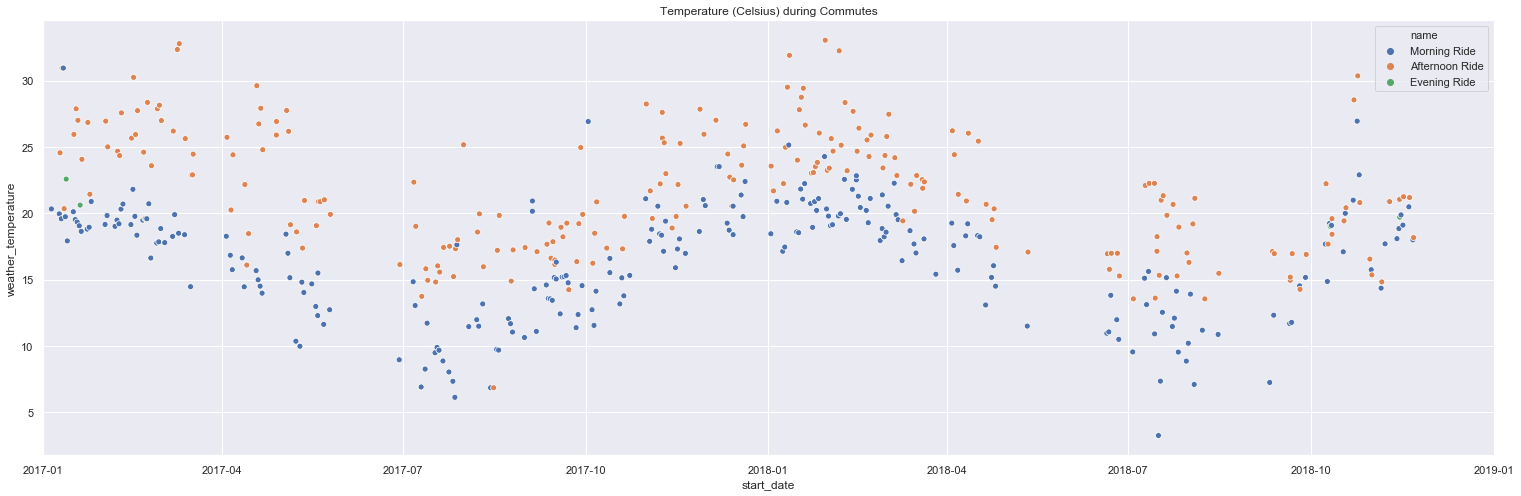

In [62]:
fig, ax = plt.subplots(figsize=(26,8))
sns.scatterplot(x='start_date', y='weather_temperature', hue='name', data=rides, ax=ax)
plt.xlim('2017', '2019')
plt.title('Temperature (Celsius) during Commutes')
plt.show()

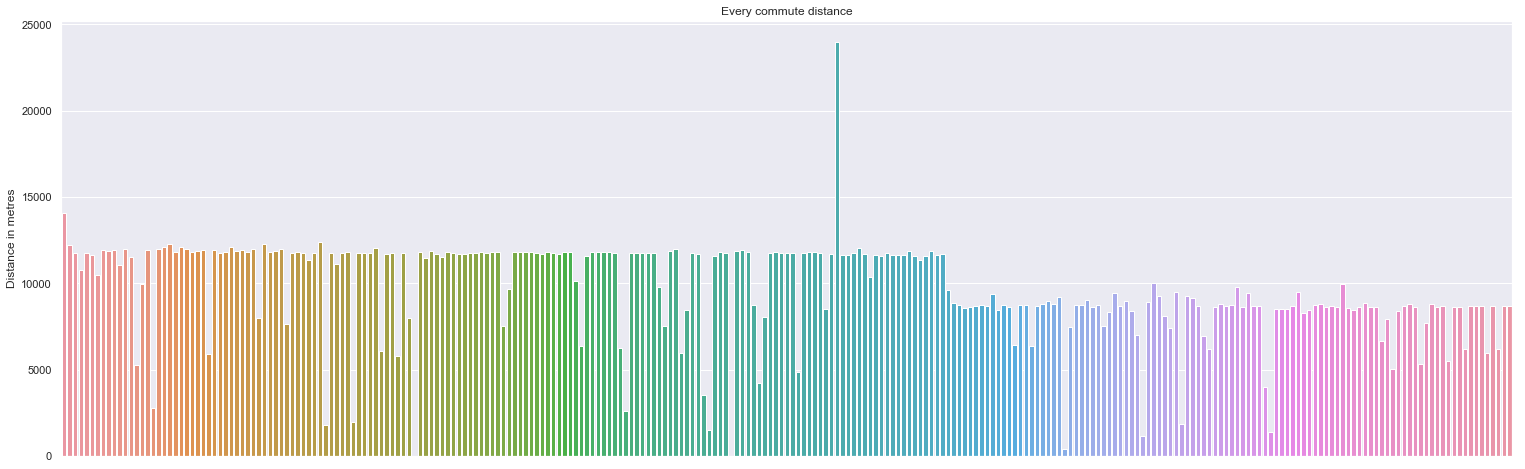

In [36]:
fig, ax = plt.subplots(figsize=(26,8))
sns.barplot(x='date', y='distance', data=rides, ci=None, ax=ax)
ax.set_ylabel('Distance in metres')    
ax.set_xlabel('')
ax.set(xticklabels=[])
plt.title("Every commute distance")
plt.show()

In [37]:
rides[rides.distance==rides.distance.max()]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round
295,1309048146,2017-12-07 05:30:00+00:00,Morning Ride,24000.0,3300,Ride,NaN,NaN,7.273,0.0,0.0,NaN,NaN,partly-cloudy-day,Mostly Cloudy,23.51,2017-12-07,05:30:00,24.0


The longest ride was 24 kilometers and 55 minutes. It was not clearly not a normal workday commute. I was off that day and took a long ride enjoying the peaceful roads during that time of year.

In [52]:
rides['month'] = [d.strftime('%B') for d in rides['date']]

In [53]:
rides['day_num'] = [d.day for d in rides['date']]

In [54]:
rides['month_num'] = [d.month for d in rides['date']]

In [109]:
rides['riding_time_minutes'] = rides['moving_time'].apply(lambda x: round(x/60))

In [40]:
import calendar

In [43]:
rides['DoW'] = rides['date'].apply(lambda x: calendar.day_name[x.weekday()])

In [55]:
rides.tail()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num
543,1973097829,2018-11-16 14:18:19+00:00,Afternoon Ride,3666.9,628,Ride,155.6,184.0,5.839,14.2,24.8,"[-33.99,18.5]","[-33.98,18.49]",partly-cloudy-day,Mostly Cloudy,21.24,2018-11-16,14:18:19,21.0,Friday,November,16,11
544,2113085260,2018-11-19 06:25:47+00:00,Morning Ride,8734.0,1534,Ride,144.3,188.0,5.694,12.4,55.8,"[-33.98,18.49]","[-33.93,18.45]",partly-cloudy-day,Mostly Cloudy,20.48,2018-11-19,06:25:47,20.0,Monday,November,19,11
545,2113085274,2018-11-19 14:54:27+00:00,Afternoon Ride,8632.7,1416,Ride,140.3,180.0,6.097,13.4,70.9,"[-33.93,18.45]","[-33.98,18.49]",clear-day,Clear,21.18,2018-11-19,14:54:27,21.0,Monday,November,19,11
546,2113085319,2018-11-21 06:43:44+00:00,Morning Ride,8690.4,1464,Ride,133.6,173.0,5.936,14.5,55.6,"[-33.98,18.49]","[-33.93,18.45]",partly-cloudy-day,Mostly Cloudy,17.99,2018-11-21,06:43:44,18.0,Wednesday,November,21,11
547,2113085283,2018-11-21 14:44:25+00:00,Afternoon Ride,8653.5,1702,Ride,127.1,180.0,5.084,10.2,71.7,"[-33.93,18.45]","[-33.98,18.49]",partly-cloudy-day,Windy and Partly Cloudy,18.16,2018-11-21,14:44:25,18.0,Wednesday,November,21,11


There are 249 working days in a year, the remaining days comprise of 104 weekend days and 12 public holidays. 
In South Africa, one typically has 15 days leave per annum

In [46]:
rides.date.nunique()

261

In [110]:
# filtering only 2017
rides2017 = rides[rides.start_date < '2018-01-01 00:00']

In [57]:
def plot_daily_heatgram(df, title):
    daily_rides_dist = df.groupby( ['month_num', 'day_num'])['distance'].sum().to_frame().reset_index()
    daily_rides_dist_pivot = daily_rides_dist.pivot('month_num', 'day_num', 'distance')
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(daily_rides_dist_pivot, ax=ax, cmap="YlGnBu", vmax=32000)
    plt.title(title)

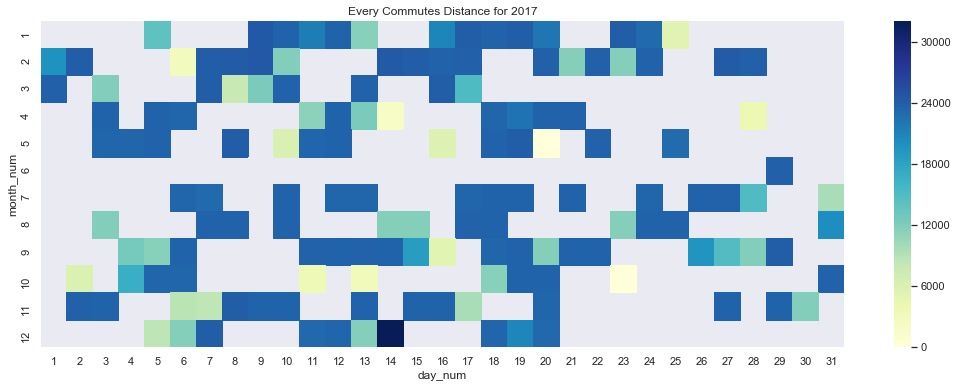

In [58]:
plot_daily_heatgram(rides2017, 'Every Commutes Distance for 2017')

In [59]:
rides2017[(rides2017.start_date > '2017-12-13 00:00') & (rides2017.start_date < '2017-12-15 00:00')]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num
300,1313715658,2017-12-13 13:43:51+00:00,Afternoon Ride,11725.7,1979,Ride,117.4,177.0,5.925,13.5,118.6,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Mostly Cloudy,20.53,2017-12-13,13:43:51,21.0,Wednesday,December,13,12
301,1313487970,2017-12-14 06:00:00+00:00,Morning Ride,11850.0,2100,Ride,NaN,NaN,5.643,0.0,0.0,NaN,NaN,partly-cloudy-day,Mostly Cloudy,20.53,2017-12-14,06:00:00,21.0,Thursday,December,14,12
302,1313715659,2017-12-14 06:18:25+00:00,Morning Ride,11540.9,1868,Ride,147.5,178.0,6.178,13.9,96.6,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Partly Cloudy,18.38,2017-12-14,06:18:25,18.0,Thursday,December,14,12
303,1313715700,2017-12-14 12:22:59+00:00,Afternoon Ride,12806.5,2598,Ride,151.2,186.0,4.929,15.1,143.8,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,22.51,2017-12-14,12:22:59,23.0,Thursday,December,14,12


In [140]:
# filtering only 2018
rides2018 = rides[rides.start_date > '2018-01-01 00:00']

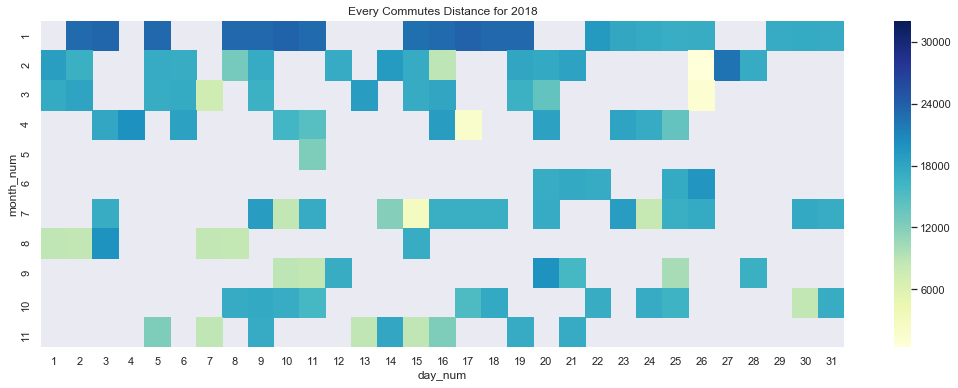

In [61]:
plot_daily_heatgram(rides2018, 'Every Commutes Distance for 2018')

In [219]:
rides_count = rides.groupby('new_date').agg({'distance':['count','sum']})

In [222]:
rides_count.head()

distance         
              count      sum
new_date                    
2017-01-05        1  14068.4
2017-01-09        2  24404.1
2017-01-10        2  23556.1
2017-01-11        2  21530.8
2017-01-12        2  23533.6

In [220]:
rides_count.columns

MultiIndex(levels=[['distance'], ['count', 'sum']],
           codes=[[0, 0], [0, 1]])

In [221]:
rides_count.columns.values

array([('distance', 'count'), ('distance', 'sum')], dtype=object)

In [225]:
rides_count.columns = [' '.join(col).strip() for col in rides_count.columns.values]

In [226]:
rides_count.head()

,distance count,distance sum
new_date,,
2017-01-05,1,14068.4
2017-01-09,2,24404.1
2017-01-10,2,23556.1
2017-01-11,2,21530.8
2017-01-12,2,23533.6


In [238]:
incomplete_rides = rides_count[(rides_count['distance count']<2) & (rides_count['distance sum'] < 5000)].reset_index()

In [242]:
incomplete_rides.new_date[0].weekday()

0

In [228]:
rides_count[(rides_count['distance count']<2)]

,distance count,distance sum
new_date,,
2017-01-05,1,14068.4
2017-01-13,1,11607.9
2017-01-25,1,5265.9
2017-02-06,1,2782.5
2017-02-10,1,11792.2
2017-02-23,1,11735.4
2017-03-03,1,11789.3
2017-03-08,1,7978.0
2017-03-09,1,12252.0


In [234]:
rides2017.groupby('DoW',sort=False)['distance'].agg(['count', 'sum', 'mean', 'min', 'max'])

,count,sum,mean,min,max
DoW,,,,,
Thursday,65,780403.6,12006.209231,8483.0,24000.0
Monday,48,522327.7,10881.827083,17.0,12747.4
Tuesday,41,440695.4,10748.668293,0.0,12235.5
Wednesday,54,579170.2,10725.374074,3270.4,12418.4
Friday,54,525990.8,9740.570370,4.4,12121.7
Saturday,3,5234.6,1744.866667,0.0,2906.2


In [235]:
rides2018.groupby('DoW',sort=False)['distance'].agg(['count', 'sum', 'mean', 'min', 'max'])

,count,sum,mean,min,max
DoW,,,,,
Tuesday,48,415823.9,8662.997917,1450.7,11715.5
Wednesday,52,448259.0,8620.365385,1056.4,12104.5
Friday,37,326097.0,8813.432432,3666.9,11745.6
Monday,43,371278.8,8634.390698,388.1,11705.2
Thursday,33,269932.8,8179.781818,2551.4,11672.7
Saturday,3,11987.1,3995.700000,2650.4,6670.0
Sunday,2,2793.8,1396.900000,1364.1,1429.7


### heartrate

---

# 2017

In [68]:
rides2017.head()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num
18,825995859,2017-01-05 05:40:50+00:00,Morning Ride,14068.4,2641,Ride,NaN,NaN,5.327,10.8,73.4,"[-33.98,18.49]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,20.32,2017-01-05,05:40:50,20.0,Thursday,January,5,1
19,826004613,2017-01-09 05:05:37+00:00,Morning Ride,11656.7,1649,Ride,NaN,NaN,7.069,11.6,62.0,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Partly Cloudy,19.95,2017-01-09,05:05:37,20.0,Monday,January,9,1
20,826347689,2017-01-09 13:55:28+00:00,Afternoon Ride,12747.4,3144,Ride,NaN,NaN,4.055,13.5,78.5,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,24.55,2017-01-09,13:55:28,25.0,Monday,January,9,1
21,827011243,2017-01-10 05:08:35+00:00,Morning Ride,11638.4,1739,Ride,NaN,NaN,6.693,10.7,60.5,"[-33.98,18.49]","[-33.92,18.42]",clear-day,Clear,19.58,2017-01-10,05:08:35,20.0,Tuesday,January,10,1
22,827376855,2017-01-10 13:50:34+00:00,Afternoon Ride,11917.7,2423,Ride,NaN,NaN,4.919,9.6,73.2,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,30.94,2017-01-10,13:50:34,31.0,Tuesday,January,10,1


### Distance

In [69]:
rides2017.distance.sum()

2853822.3

Total distance cycled was 2853,82km

In [73]:
round(rides2017.distance.mean(),2)

10769.14

In [82]:
rides2017.distance.mode()

0        0.0
1    11600.6
2    11695.0
3    11717.0
4    11790.5
5    11833.3
dtype: float64

In [71]:
rides2017.distance.max()

24000.0

In [76]:
rides2017.distance.min()

0.0

In [75]:
rides2017[rides2017.distance == rides2017.distance.min()]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num
67,875749748,2017-02-21 13:40:37+00:00,Afternoon Ride,0.0,2518,Ride,NaN,NaN,0.0,0.0,0.0,NaN,NaN,partly-cloudy-day,Partly Cloudy,19.61,2017-02-21,13:40:37,20.0,Tuesday,February,21,2
141,996834743,2017-05-20 11:19:22+00:00,Afternoon Ride,0.0,2355,Ride,160.5,188.0,0.0,0.0,0.0,NaN,NaN,clear-day,Clear,20.87,2017-05-20,11:19:22,21.0,Saturday,May,20,5


### Temperature

In [78]:
rides2017.weather_temperature.max()

32.78

In [79]:
rides2017.weather_temperature.min()

6.12

In [80]:
rides2017.weather_temperature.mean()

18.836226415094337

In [81]:
rides2017.weather_temperature.mode()

0    20.53
dtype: float64

In [83]:
rides2017.weather_temperature_round.mode()

0    19.0
dtype: float64

In [86]:
rides2017.weather_temperature_round.value_counts().head(10)

19.0    28
20.0    24
18.0    23
15.0    20
21.0    19
17.0    18
16.0    15
14.0    12
28.0    11
25.0    10
Name: weather_temperature_round, dtype: int64

In [88]:
rides2017.weather_summary.value_counts()

Clear               105
Partly Cloudy        88
Mostly Cloudy        61
Overcast              9
Possible Drizzle      2
Name: weather_summary, dtype: int64

### Commutes

In [90]:
rides2017.date.nunique()

147

In [91]:
def plot_daily_heatgram(df, title):
    daily_rides_dist = df.groupby( ['month_num', 'day_num'])['distance'].sum().to_frame().reset_index()
    daily_rides_dist_pivot = daily_rides_dist.pivot('month_num', 'day_num', 'distance')
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(daily_rides_dist_pivot, ax=ax, cmap="YlGnBu", vmax=32000)
    plt.title(title)

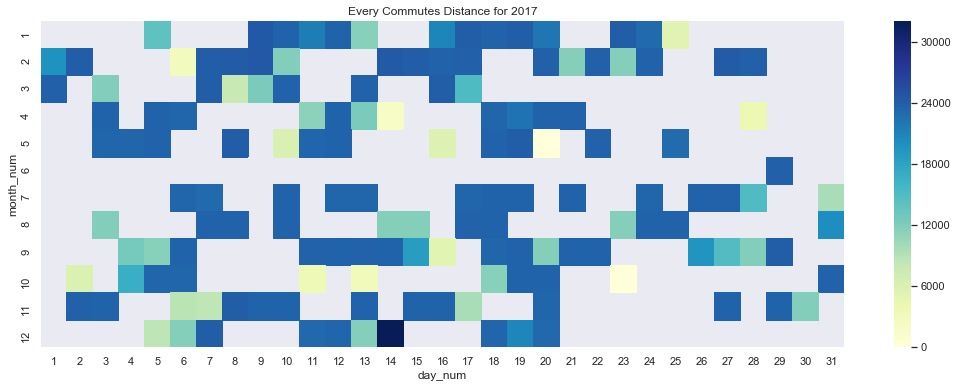

In [92]:
plot_daily_heatgram(rides2017, 'Every Commutes Distance for 2017')

In [111]:
rides2017.head()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num,riding_time_minutes
18,825995859,2017-01-05 05:40:50+00:00,Morning Ride,14068.4,2641,Ride,NaN,NaN,5.327,10.8,73.4,"[-33.98,18.49]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,20.32,2017-01-05,05:40:50,20.0,Thursday,January,5,1,44
19,826004613,2017-01-09 05:05:37+00:00,Morning Ride,11656.7,1649,Ride,NaN,NaN,7.069,11.6,62.0,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Partly Cloudy,19.95,2017-01-09,05:05:37,20.0,Monday,January,9,1,27
20,826347689,2017-01-09 13:55:28+00:00,Afternoon Ride,12747.4,3144,Ride,NaN,NaN,4.055,13.5,78.5,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,24.55,2017-01-09,13:55:28,25.0,Monday,January,9,1,52
21,827011243,2017-01-10 05:08:35+00:00,Morning Ride,11638.4,1739,Ride,NaN,NaN,6.693,10.7,60.5,"[-33.98,18.49]","[-33.92,18.42]",clear-day,Clear,19.58,2017-01-10,05:08:35,20.0,Tuesday,January,10,1,29
22,827376855,2017-01-10 13:50:34+00:00,Afternoon Ride,11917.7,2423,Ride,NaN,NaN,4.919,9.6,73.2,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,30.94,2017-01-10,13:50:34,31.0,Tuesday,January,10,1,40


In [117]:
rides2017.groupby('month', sort=False).agg({'distance':['count', 'mean', 'sum'], 'average_heartrate':'mean', 'average_speed':'mean', 'max_speed':'mean', 'riding_time_minutes':'mean'})

distance                         average_heartrate average_speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         25  11426.504000  285662.6               NaN      9.218560   
February        33  11194.933333  369432.8               NaN      5.507909   
March           15  11097.100000  166456.5               NaN      5.347000   
April           21  10310.352381  216517.4        146.235714      5.906381   
May             24  10310.258333  247446.2        145.104545      5.764542   
June             2  11888.100000   23776.2        127.050000      5.798000   
July            27  11348.674074  306414.2        131.840741      6.030481   
August          20  11614.660000  232293.2        135.394737      6.008600   
September       34  10076.452941  342599.4        135.620588      5.946412   
October         18   8818.005556  158724.1        115.600000      5.153778   
November        29  10291.093103  298441.7        122.427586      5.806448   
December        17  12121.058824  206058.0        129.920000      5.869647   

           max_speed riding_time_minutes  
                mean                mean  
month                                     
January    10.336000           34.200000  
February   10.560606           35.090909  
March       9.880000           41.866667  
April      10.290476           28.952381  
May         9.554167           30.333333  
June        9.400000           34.500000  
July        9.681481           31.407407  
August      9.225000           32.450000  
September   9.829412           27.794118  
October     8.877778           26.277778  
November    9.841379           29.827586  
December   12.476471           34.647059

In [113]:
mornin_rides2017 = rides2017[rides2017.name=='Morning Ride']

In [114]:
afternoon_rides2017 = rides2017[rides2017.name=='Afternoon Ride']

In [118]:
mornin_rides2017.groupby('month', sort=False).agg({'distance':['count', 'mean', 'sum'], 'average_heartrate':'mean', 'average_speed':'mean', 'max_speed':'mean', 'riding_time_minutes':'mean', 'weather_temperature':'mean'})

distance                         average_heartrate average_speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         14  11421.164286  159896.3               NaN      5.941214   
February        18  11255.250000  202594.5               NaN      6.239056   
March            7  11239.071429   78673.5               NaN      6.433143   
April            9  11623.600000  104612.4        151.666667      6.472889   
May             13   9943.669231  129267.7        140.141667      6.241462   
June             1  11907.300000   11907.3        105.400000      5.577000   
July            13  11687.692308  151940.0        128.223077      6.126385   
August          11  11732.627273  129058.9        135.300000      6.183455   
September       19  10004.468421  190084.9        132.015789      6.190474   
October         11   8236.645455   90603.1        107.490909      5.190182   
November        15  10734.206667  161013.1        116.346667      6.150800   
December         9  12705.000000  114345.0        118.071429      6.608556   

           max_speed riding_time_minutes weather_temperature  
                mean                mean                mean  
month                                                         
January     9.900000           33.571429           20.263571  
February   10.522222           30.166667           19.349444  
March      10.757143           29.142857           18.012857  
April      10.544444           29.888889           15.670000  
May         9.961538           26.461538           13.802308  
June        8.200000           36.000000            8.950000  
July        9.223077           31.923077           10.132308  
August      9.518182           31.727273           10.881818  
September   9.589474           26.473684           14.695789  
October     7.972727           22.454545           15.987273  
November    9.760000           29.466667           18.522667  
December   11.588889           31.777778           20.822222

In [119]:
afternoon_rides2017.groupby('month', sort=False).agg({'distance':['count', 'mean', 'sum'], 'average_heartrate':'mean', 'average_speed':'mean', 'max_speed':'mean', 'riding_time_minutes':'mean', 'weather_temperature':'mean'})

distance                         average_heartrate average_speed  \
             count          mean       sum              mean          mean   
month                                                                        
January          9  11313.988889  101825.9               NaN     15.201333   
February        15  11122.553333  166838.3               NaN      4.630533   
March            8  10972.875000   87783.0               NaN      4.396625   
April           12   9325.416667  111905.0        142.162500      5.481500   
May             11  10743.500000  118178.5        151.060000      5.200909   
June             1  11868.900000   11868.9        148.700000      6.019000   
July            14  11033.871429  154474.2        135.200000      5.941429   
August           9  11470.477778  103234.3        135.525000      5.794889   
September       15  10167.633333  152514.5        140.186667      5.637267   
October          7   9731.571429   68121.0        128.342857      5.096571   
November        14   9816.328571  137428.6        128.942857      5.437500   
December         8  11464.125000   91713.0        140.287500      5.038375   

           max_speed riding_time_minutes weather_temperature  
                mean                mean                mean  
month                                                         
January    10.900000           34.333333           25.441111  
February   10.606667           41.000000           26.014667  
March       9.112500           53.000000           26.767500  
April      10.100000           28.250000           24.075000  
May         9.072727           34.909091           21.061818  
June       10.600000           33.000000           16.130000  
July       10.107143           30.928571           17.347143  
August      8.866667           33.333333           16.431111  
September  10.133333           29.466667           18.143333  
October    10.300000           32.285714           19.748571  
November    9.928571           30.214286           23.243571  
December   13.475000           37.875000           24.077500

__notes:__
- most ridden month February with 33 commutes in 18 days
- December had longest average distance
- - the best time of year with less cars = more alternative routes
- There was not one month where morning == afternoon ride
- Feb and March has the longest ride time in the afternoon, summer heat!
- The cooler months in Autumn have the fastest morning commutes

In [121]:
rides2017[rides2017.riding_time_minutes == rides2017.riding_time_minutes.max()]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num,riding_time_minutes
88,898922211,2017-03-13 13:48:18+00:00,Afternoon Ride,12019.5,9941,Ride,NaN,NaN,1.209,10.4,74.7,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,25.62,2017-03-13,13:48:18,26.0,Monday,March,13,3,166


In [122]:
rides2017[rides2017.weather_temperature == rides2017.weather_temperature.max()]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num,riding_time_minutes
86,894572839,2017-03-10 13:32:11+00:00,Afternoon Ride,11901.6,2178,Ride,NaN,NaN,5.464,9.9,71.7,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,32.78,2017-03-10,13:32:11,33.0,Friday,March,10,3,36


---

# 2018

In [123]:
rides2018.head()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num
317,1337961218,2018-01-02 05:56:34+00:00,Morning Ride,11524.1,1955,Ride,120.6,179.0,5.895,14.2,104.4,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Mostly Cloudy,18.45,2018-01-02,05:56:34,18.0,Tuesday,January,2,1
318,1337961260,2018-01-02 09:45:33+00:00,Afternoon Ride,11685.5,2211,Ride,149.4,195.0,5.285,12.1,144.3,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,23.55,2018-01-02,09:45:33,24.0,Tuesday,January,2,1
320,1339085711,2018-01-03 06:11:38+00:00,Morning Ride,11497.7,1746,Ride,144.3,178.0,6.585,15.3,97.3,"[-33.98,18.49]","[-33.92,18.42]",clear-day,Clear,21.68,2018-01-03,06:11:38,22.0,Wednesday,January,3,1
321,1339089583,2018-01-03 13:30:00+00:00,Afternoon Ride,12000.0,2880,Ride,NaN,NaN,4.167,0.0,0.0,NaN,NaN,clear-day,Clear,21.68,2018-01-03,13:30:00,22.0,Wednesday,January,3,1
322,1342549421,2018-01-05 06:00:12+00:00,Morning Ride,11532.5,1682,Ride,106.8,137.0,6.856,15.6,104.7,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Partly Cloudy,20.90,2018-01-05,06:00:12,21.0,Friday,January,5,1


### Distance

In [124]:
rides2018.distance.sum()

1846172.4

In [125]:
round(rides2018.distance.mean(),2)

8468.68

In [126]:
rides2018.distance.mode()

0    8687.4
1    8785.4
2    8810.4
dtype: float64

In [127]:
rides2018.distance.max()

12104.5

In [128]:
rides2018.distance.min()

388.1

In [129]:
rides2018[rides2018.distance == rides2018.distance.min()]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num
388,1429483133,2018-02-26 06:12:15+00:00,Morning Ride,388.1,111,Ride,111.7,126.0,3.496,6.2,4.3,"[-33.98,18.49]","[-33.98,18.49]",clear-day,Clear,17.94,2018-02-26,06:12:15,18.0,Monday,February,26,2


### Temperature

In [130]:
rides2018.weather_temperature.max()

33.04

In [131]:
rides2018.weather_temperature.min()

3.24

In [132]:
rides2018.weather_temperature.mean()

19.328944954128428

In [134]:
rides2018.weather_temperature_round.mode()

0    21.0
dtype: float64

In [135]:
rides2018.weather_temperature_round.value_counts().head(10)

21.0    25
19.0    20
20.0    20
18.0    17
17.0    16
15.0    15
22.0    14
23.0    13
24.0     9
14.0     9
Name: weather_temperature_round, dtype: int64

In [136]:
rides2018.weather_summary.value_counts()

Clear                      94
Partly Cloudy              66
Mostly Cloudy              47
Overcast                    9
Windy and Partly Cloudy     2
Name: weather_summary, dtype: int64

### Commutes

In [137]:
rides2018.date.nunique()

114

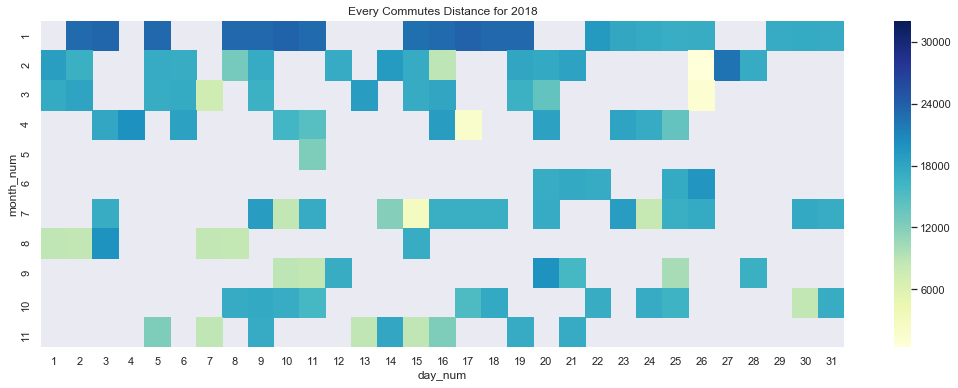

In [138]:
plot_daily_heatgram(rides2018, 'Every Commutes Distance for 2018')

In [141]:
rides2018.groupby('month', sort=False).agg({'distance':['count', 'mean', 'sum'], 'average_heartrate':'mean', 'average_speed':'mean', 'max_speed':'mean', 'riding_time_minutes':'mean'})

distance                         average_heartrate average_speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         40  10513.400000  420536.0        131.428205      5.705775   
February        32   8048.171875  257541.5        130.418750      5.642437   
March           22   8211.700000  180657.4        129.845455      5.296000   
April           21   8390.566667  176201.9        128.814286      5.612381   
May              2   6164.700000   12329.4        122.600000      6.100500   
June            10   8930.390000   89303.9        142.970000      5.190100   
July            31   7800.519355  241816.1        140.840000      5.226613   
August           8   8943.775000   71550.2        134.262500      5.227625   
September       13   7501.246154   97516.2        140.500000      4.989308   
October         23   7742.843478  178085.4        142.208696      5.084739   
November        16   7539.650000  120634.4        136.550000      5.484563   

           max_speed riding_time_minutes  
                mean                mean  
month                                     
January    13.520000           31.150000  
February   12.890625           23.625000  
March      12.722727           25.863636  
April      12.761905           25.047619  
May        12.300000           17.000000  
June       12.080000           28.800000  
July       11.625806           24.806452  
August     12.075000           28.625000  
September  12.130769           24.461538  
October    11.821739           25.434783  
November   12.656250           22.437500

In [142]:
mornin_rides2018 = rides2018[rides2018.name=='Morning Ride']

In [143]:
afternoon_rides2018 = rides2018[rides2018.name=='Afternoon Ride']

In [144]:
mornin_rides2018.groupby('month', sort=False).agg({'distance':['count', 'mean', 'sum'], 'average_heartrate':'mean', 'average_speed':'mean', 'max_speed':'mean', 'riding_time_minutes':'mean', 'weather_temperature':'mean'})

distance                         average_heartrate average_speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         20  10453.700000  209074.0        123.535000      6.270650   
February        18   7631.983333  137375.7        117.577778      5.818278   
March           11   7953.990909   87493.9        122.836364      5.607091   
April           11   7756.663636   85323.3        122.618182      5.717455   
May              1   8653.600000    8653.6         98.700000      6.064000   
June             5   9154.880000   45774.4        140.300000      5.087000   
July            15   8257.820000  123867.3        141.560000      5.318467   
August           4   9368.350000   37473.4        124.425000      5.483750   
September        6   8450.683333   50704.1        148.633333      5.246000   
October         10   8718.280000   87182.8        142.310000      5.488200   
November         9   8146.300000   73316.7        135.577778      5.838111   

           max_speed riding_time_minutes weather_temperature  
                mean                mean                mean  
month                                                         
January    14.640000           27.750000           20.500000  
February   13.355556           21.277778           20.324444  
March      13.209091           23.181818           18.545455  
April      12.672727           22.545455           16.846364  
May        12.900000           24.000000           11.490000  
June       11.540000           30.000000           11.654000  
July       12.126667           25.866667           11.250667  
August     13.275000           28.750000           10.757500  
September  12.133333           26.833333           12.113333  
October    12.700000           26.800000           19.445000  
November   13.044444           23.333333           18.588889

In [145]:
afternoon_rides2018.groupby('month', sort=False).agg({'distance':['count', 'mean', 'sum'], 'average_heartrate':'mean', 'average_speed':'mean', 'max_speed':'mean', 'riding_time_minutes':'mean', 'weather_temperature':'mean'})

distance                         average_heartrate average_speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         20  10573.100000  211462.0        139.736842      5.140900   
February        14   8583.271429  120165.8        146.928571      5.416357   
March           11   8469.409091   93163.5        136.854545      4.984909   
April           10   9087.860000   90878.6        135.630000      5.496800   
May              1   3675.800000    3675.8        146.500000      6.137000   
June             5   8705.900000   43529.5        145.640000      5.293200   
July            16   7371.800000  117948.8        140.120000      5.140500   
August           4   8519.200000   34076.8        144.100000      4.971500   
September        7   6687.442857   46812.1        133.528571      4.769286   
October         12   6857.633333   82291.6        141.866667      4.782250   
November         6   6538.150000   39228.9        134.700000      4.941167   

           max_speed riding_time_minutes weather_temperature  
                mean                mean                mean  
month                                                         
January    12.400000           34.550000           25.788000  
February   12.292857           26.642857           25.815000  
March      12.236364           28.545455           22.874545  
April      12.860000           27.800000           22.236000  
May        11.700000           10.000000           17.070000  
June       12.620000           27.600000           16.388000  
July       11.156250           23.812500           18.420000  
August     10.875000           28.500000           17.330000  
September  12.128571           22.428571           16.040000  
October    11.125000           23.833333           20.840000  
November   11.716667           20.833333           19.551667

__notes:__
- 

In [146]:
rides2018[rides2018.riding_time_minutes == rides2018.riding_time_minutes.max()]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num,riding_time_minutes
321,1339089583,2018-01-03 13:30:00+00:00,Afternoon Ride,12000.0,2880,Ride,NaN,NaN,4.167,0.0,0.0,NaN,NaN,clear-day,Clear,21.68,2018-01-03,13:30:00,22.0,Wednesday,January,3,1,48


In [147]:
rides2018[rides2018.weather_temperature == rides2018.weather_temperature.max()]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,date,time,weather_temperature_round,DoW,month,day_num,month_num,riding_time_minutes
356,1384048095,2018-01-29 14:26:17+00:00,Afternoon Ride,8615.0,1521,Ride,148.3,167.0,5.664,15.0,76.0,"[-33.93,18.45]","[-33.98,18.49]",clear-day,Clear,33.04,2018-01-29,14:26:17,33.0,Monday,January,29,1,25
